# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# # Try loading one file
# !ls
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [2]:
import random , time,datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Select the folder having data files
os.makedirs('/content/drive/MyDrive/trip_records', exist_ok=True)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_df = pd.read_parquet(file_path)  # Replace with actual file reading code

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in current_df['tpep_pickup_datetime'].dt.date.unique():
            for hour in range(24):
                # Iterate through each hour of the selected date
                hour_data = current_df[
                    (current_df['tpep_pickup_datetime'].dt.date == date) &
                    (current_df['tpep_pickup_datetime'].dt.hour == hour)
                ]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
       pass

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [5]:
# Store the df in csv/parquet
df.to_parquet("/content/drive/MyDrive/trip_records/2023-1.parquet")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

In [ ]:
# # Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/trip_records/2023-1.parquet')

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/trip_records/2023-1.parquet') # replace with your file name if different

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df = df.drop(['VendorID', 'store_and_fwd_flag'], axis=1)  # Dropping unnecessary columns for this analysis

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns if they both exist
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
    df = df.drop(['Airport_fee'], axis=1)
elif 'Airport_fee' in df.columns:  # Rename Airport_fee to airport_fee if it's the only one
    df = df.rename(columns={'Airport_fee': 'airport_fee'})
# If only airport_fee exists, no action needed

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
negative_fare_rows = df[df['fare_amount'] < 0]
negative_fare_rows

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_rows['RatecodeID'].value_counts()

,count
RatecodeID,


In [ ]:
# Find which columns have negative values
negative_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                'improvement_surcharge', 'total_amount', 'congestion_surcharge']
for col in negative_cols:
    print(f"Column '{col}' has {df[df[col] < 0].shape[0]} negative values")

Column 'fare_amount' has 0 negative values
Column 'extra' has 0 negative values
Column 'mta_tax' has 153 negative values
Column 'tip_amount' has 0 negative values
Column 'tolls_amount' has 0 negative values
Column 'improvement_surcharge' has 163 negative values
Column 'total_amount' has 163 negative values
Column 'congestion_surcharge' has 116 negative values


In [ ]:
# fix these negative values
# fix these negative values
for col in negative_cols:
    df.loc[df[col] < 0, col] = 0  # Replacing negative values with 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          2.356763
trip_distance            0.000000
RatecodeID               2.356763
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     2.356763
airport_fee              2.356763
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print(df[df['passenger_count'].isnull()])
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2970028  2023-01-01 00:02:40   2023-01-01 00:30:36              NaN   
2970029  2023-01-01 00:57:48   2023-01-01 01:12:34              NaN   
2970030  2023-01-01 00:55:37   2023-01-01 01:00:41              NaN   
2970031  2023-01-01 00:43:47   2023-01-01 00:56:12              NaN   
2970032  2023-01-01 00:34:00   2023-01-01 00:51:00              NaN   
...                      ...                   ...              ...   
3041709  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3041710  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3041711  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3041712  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3041713  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
2970028           0.00         NaN           142            79     

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
# This might depend on your specific data and the analysis goals
# For example, you can choose to drop rows with missing values in other columns
df = df.dropna()  # This drops rows with any missing values

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2970028,2970028,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06,2.970028e+06
mean,2023-01-17 00:32:39.689166,2023-01-17 00:48:20.630616,1.362847e+00,3.441844e+00,1.500250e+00,1.664712e+02,1.645190e+02,1.205106e+00,1.862391e+01,1.590298e+00,4.962575e-01,3.386719e+00,5.282501e-01,9.984462e-01,2.739987e+01,2.309968e+00,1.098142e-01
min,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.250000e+00
25%,2023-01-09 16:32:42,2023-01-09 16:47:33.750000,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.545000e+01,2.500000e+00,0.000000e+00
50%,2023-01-17 08:46:37,2023-01-17 09:02:42.500000,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.740000e+00,0.000000e+00,1.000000e+00,2.015000e+01,2.500000e+00,0.000000e+00
75%,2023-01-24 16:28:19,2023-01-24 16:44:43,1.000000e+00,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.864000e+01,2.500000e+00,0.000000e+00
max,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,6.235952e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,NaN,NaN,8.974244e-01,4.226597e+01,6.501645e+00,6.406739e+01,6.991449e+01,4.578084e-01,1.748109e+01,1.783260e+00,5.368341e-02,3.838341e+00,2.019597e+00,3.460580e-02,2.173385e+01,6.625464e-01,3.539063e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [ ]:
# Continue with outlier handling
# - Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# - Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# - Entries where trip_distance is more than 250 miles.
df = df[df['trip_distance'] <= 250]

# - Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[df['payment_type'] != 0]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'day_type',
 'night_trip',
 'tip_percentage',
 'airport_trip']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

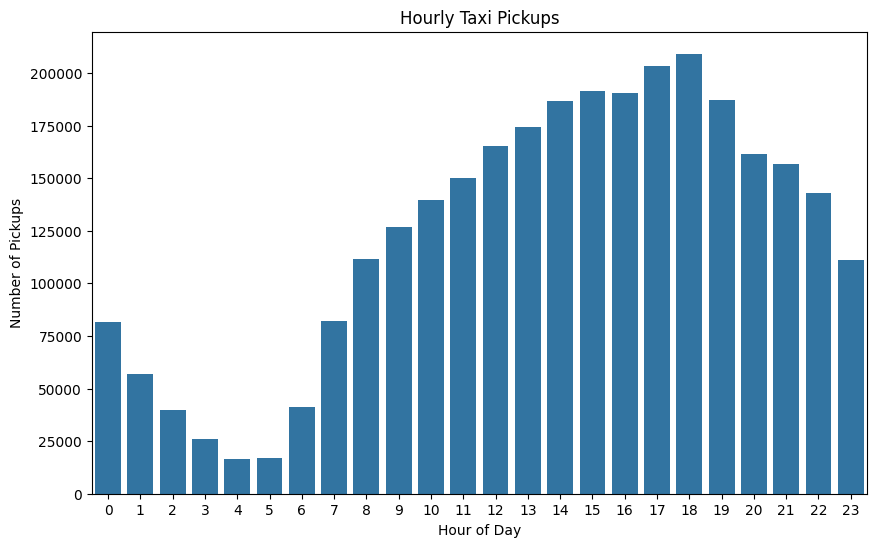

In [ ]:
# Import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #
import seaborn as sns
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df.groupby('pickup_hour')['tpep_pickup_datetime'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values)
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

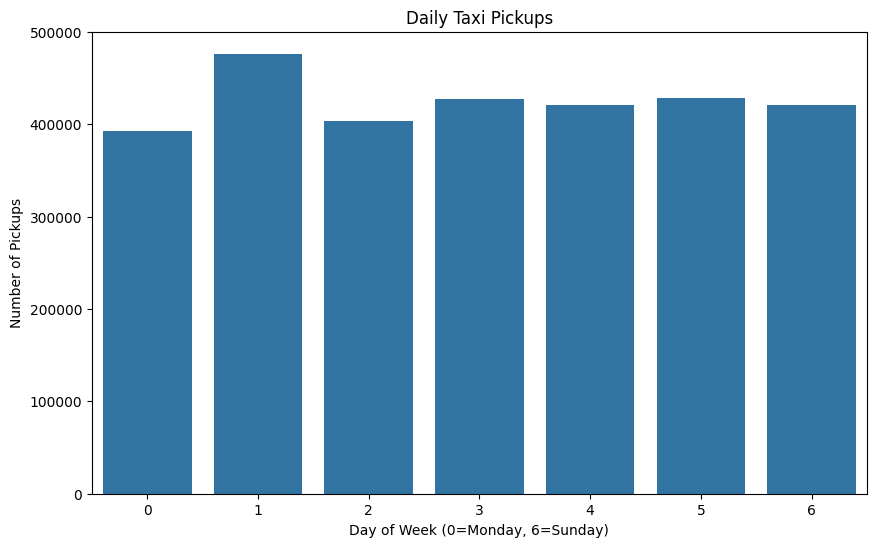

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
daily_pickups = df.groupby('pickup_day')['tpep_pickup_datetime'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()

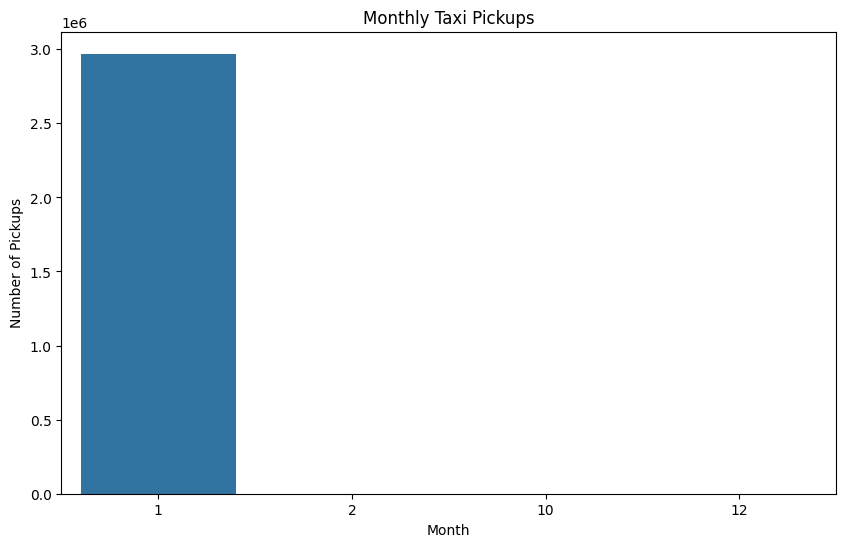

In [ ]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_pickups = df.groupby('pickup_month')['tpep_pickup_datetime'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in financial_cols:
    print(f"Column: {col}")
    print(f"Number of zero values: {df[df[col] == 0].shape[0]}")
    print(f"Number of negative values: {df[df[col] < 0].shape[0]}")
    print("-" * 20)

Column: fare_amount
Number of zero values: 974
Number of negative values: 0
--------------------
Column: tip_amount
Number of zero values: 661253
Number of negative values: 0
--------------------
Column: total_amount
Number of zero values: 615
Number of negative values: 0
--------------------
Column: trip_distance
Number of zero values: 35184
Number of negative values: 0
--------------------


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_nonzero = df[(df[financial_cols] != 0).all(axis=1)]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

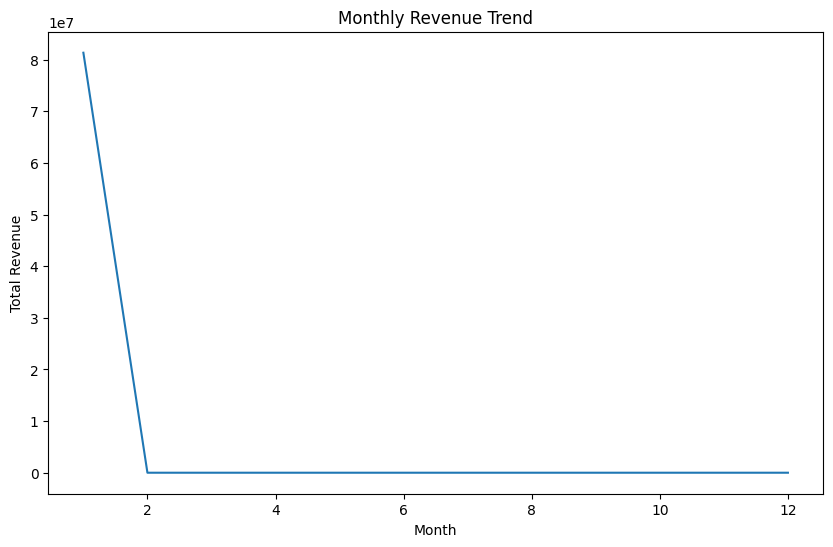

In [ ]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()
quarterly_revenue_proportion = quarterly_revenue / quarterly_revenue.sum() * 100
print(quarterly_revenue_proportion)

quarter
1    99.998157
4     0.001843
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

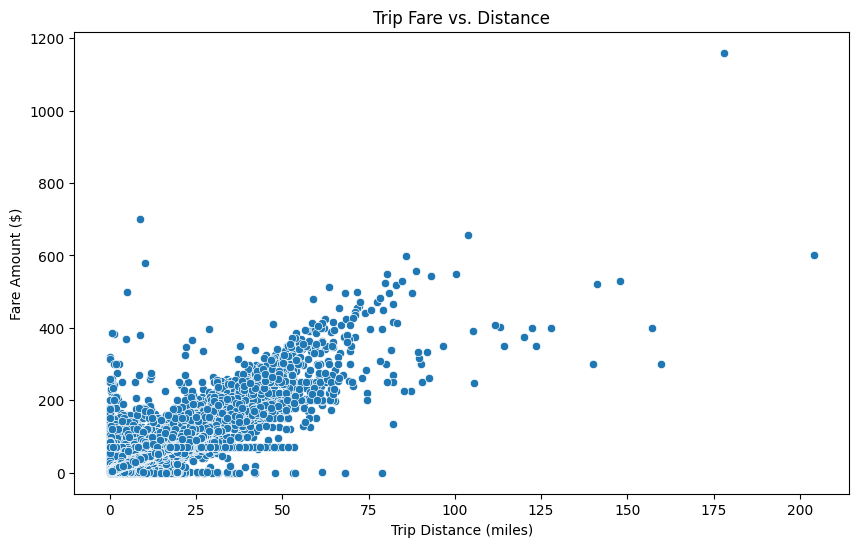

Correlation between trip distance and fare amount: 0.9223753265325682


In [ ]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df[df['trip_distance'] > 0])
plt.title('Trip Fare vs. Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

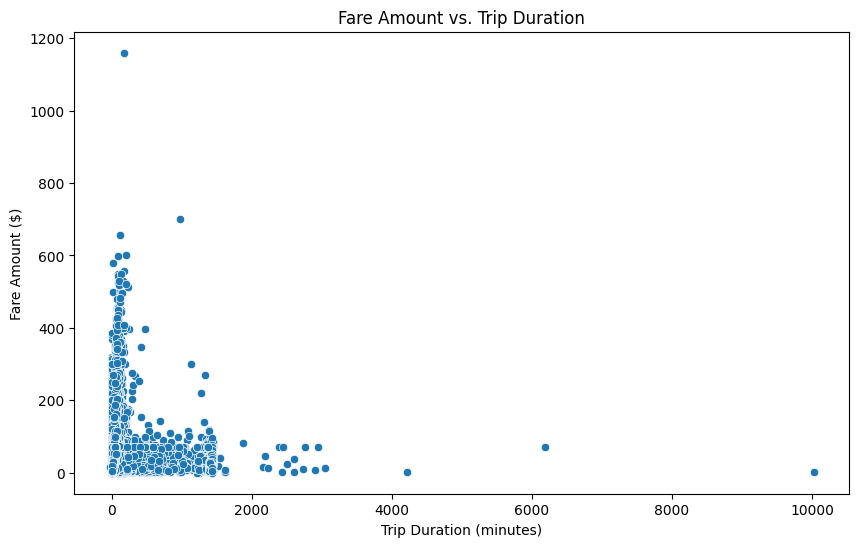

Correlation between trip duration and fare amount: 0.214377589384209


In [ ]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation}")

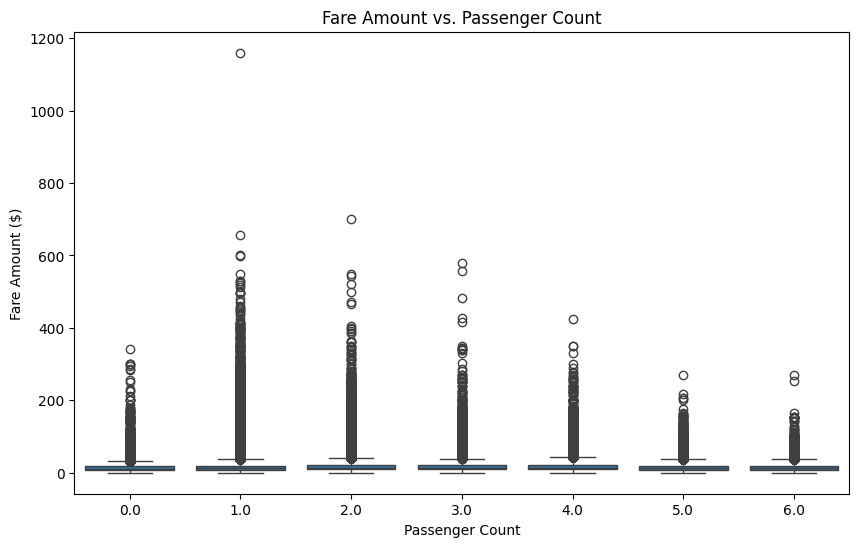

Correlation between passenger count and fare amount: 0.03338617147259466


In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation}")

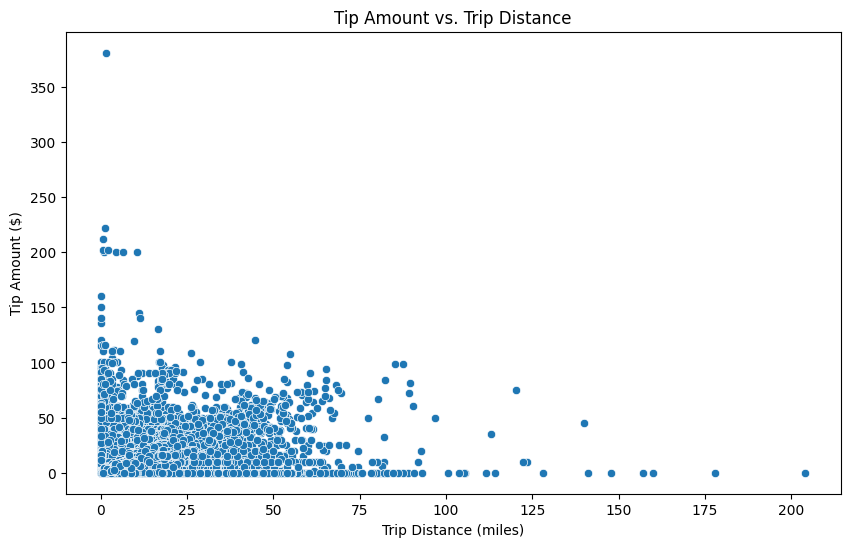

Correlation between trip distance and tip amount: 0.5832953920445195


In [ ]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

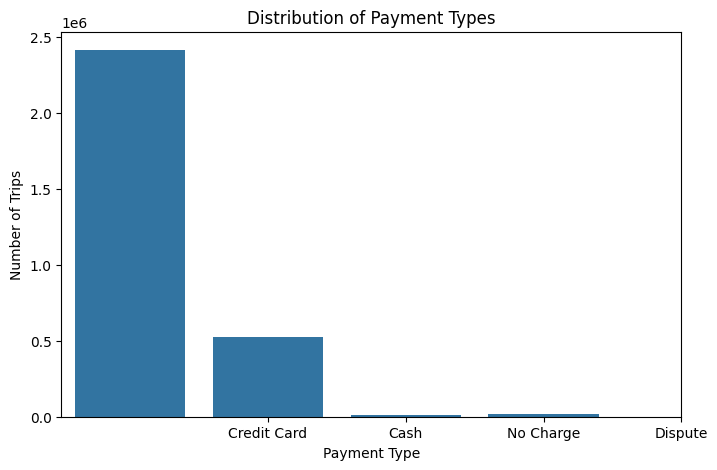

payment_type
1    2411349
2     526473
4      18520
3      13472
Name: count, dtype: int64


In [ ]:
# Analyse the distribution of different payment types (payment_type).
payment_type_distribution = df['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=df)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')

# Get the actual payment type categories present in the data
payment_types = sorted(payment_type_distribution.index.tolist())

# Define a dictionary to map payment type codes to labels
payment_type_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
# Generate labels for the observed payment types
labels = [payment_type_labels[type_code] for type_code in payment_types]
# Only display labels for observed payment types
plt.xticks(ticks=payment_types, labels=labels)
plt.show()
print(payment_type_distribution)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.shp')  # Assuming the file is in the 'taxi_zones' folder
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

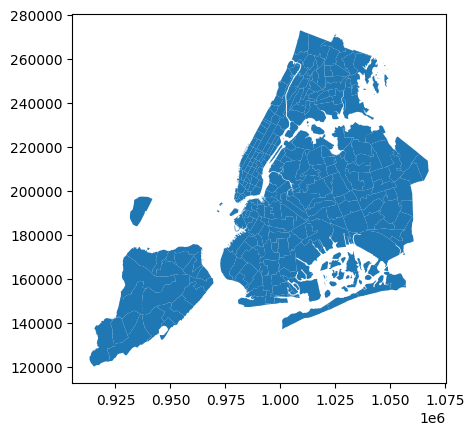

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
zones = zones.rename(columns={'LocationID': 'PULocationID'})
df_merged = pd.merge(df, zones[['PULocationID', 'zone', 'borough', 'geometry']], on='PULocationID', how='left')
df_merged.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,congestion_surcharge,airport_fee,pickup_hour,pickup_day,pickup_month,quarter,trip_duration,zone,borough,geometry
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,161,141,2,9.3,1.00,...,2.5,0.00,0,6,1,1,8.433333,Midtown Center,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,43,237,1,7.9,1.00,...,2.5,0.00,0,6,1,1,6.316667,Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,48,238,1,14.9,1.00,...,2.5,0.00,0,6,1,1,12.750000,Clinton East,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,138,7,1,12.1,7.25,...,0.0,1.25,0,6,1,1,9.616667,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,107,79,1,11.4,1.00,...,2.5,0.00,0,6,1,1,10.833333,Gramercy,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
trips_by_zone = df_merged.groupby('PULocationID')['tpep_pickup_datetime'].count().reset_index()
trips_by_zone.rename(columns={'tpep_pickup_datetime': 'trip_count'}, inplace=True)
trips_by_zone.head()

,PULocationID,trip_count
0,1,398
1,2,1
2,3,38
3,4,3088
4,5,56


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = pd.merge(zones, trips_by_zone, on='PULocationID', how='left')
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)  # Fill NaN with 0 for zones with no trips
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",398.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",1.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",38.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",3088.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",56.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

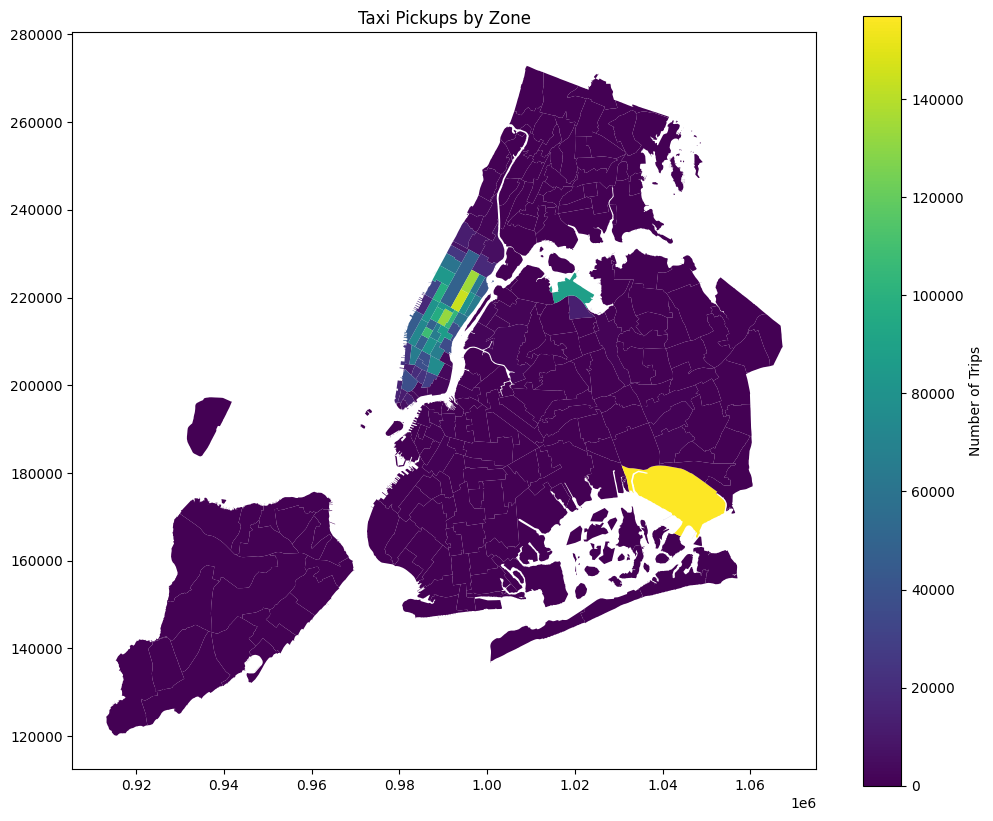

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_trips.plot(column='trip_count', ax=ax, legend=True,
                      legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})
plt.title('Taxi Pickups by Zone')
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)
zones_with_trips_sorted.head(10)  # Display top 10 zones

,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",157034.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",144668.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",134405.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",132492.0
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",107455.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",103285.0
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",97422.0
229,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",96559.0
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",88231.0
169,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",86043.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Trip duration in minutes
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup and dropoff zones and pickup hour, then calculate average speed and trip duration
route_stats = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])[['trip_distance', 'trip_duration']].mean().reset_index()
route_stats['speed'] = route_stats['trip_distance'] / route_stats['trip_duration']  # Calculate speed (miles per minute)

# Replace infinite speeds (due to 0 trip duration) with NaN
route_stats['speed'] = route_stats['speed'].replace([np.inf, -np.inf], np.nan)

# Find the slowest routes for each hour
slowest_routes_by_hour = route_stats.loc[route_stats.groupby('pickup_hour')['speed'].idxmin()]

# Display the slowest routes
print(slowest_routes_by_hour)

        PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
56                 3             3            0            0.0       0.200000   
1107               4           264            1            0.0       0.050000   
1354               7           117            2            0.0      40.133333   
1850              10            10            3            0.0       0.083333   
1851              10            10            4            0.0       0.050000   
33                 1           264            5            0.0       0.050000   
399                4           107            6            0.0       9.708333   
34                 1           264            7            0.0       0.050000   
6                  1             1            8            0.0       0.189394   
7                  1             1            9            0.0       2.116667   
44808            102            82           10            2.4     -14.533333   
140929           247        

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

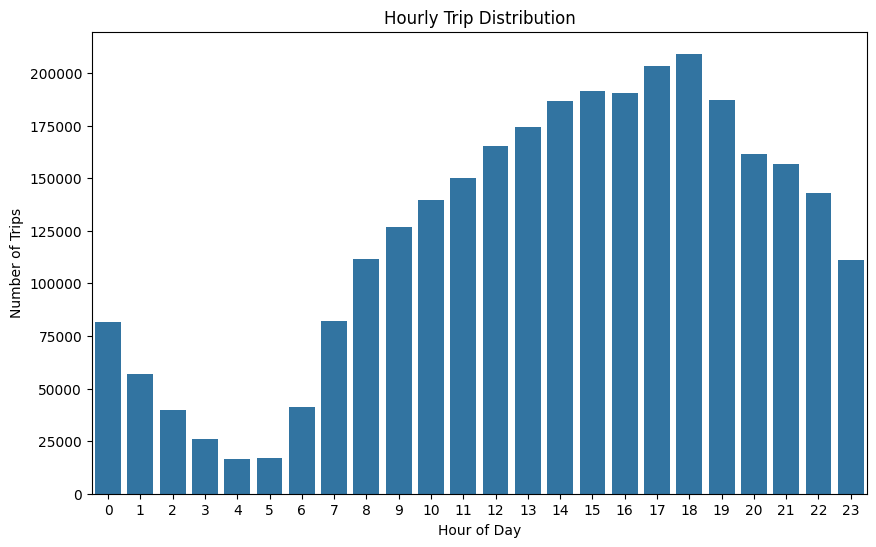

The busiest hour is 18 with 209154 trips.


In [ ]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df.groupby('pickup_hour')['tpep_pickup_datetime'].count()

# Plotting the hourly trip distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values)
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# Finding the busiest hour
busiest_hour = trips_per_hour.idxmax()
trips_in_busiest_hour = trips_per_hour.max()

print(f"The busiest hour is {busiest_hour} with {trips_in_busiest_hour} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05  # Replace with your actual sampling fraction

# Get the 5 busiest hours
busiest_hours = trips_per_hour.nlargest(5).index

# Calculate actual trips for the 5 busiest hours
actual_trips_busiest_hours = trips_per_hour[busiest_hours] / sample_fraction

print("Actual trips in the 5 busiest hours:")
print(actual_trips_busiest_hours)

Actual trips in the 5 busiest hours:
pickup_hour
18    4183080.0
17    4064160.0
15    3831120.0
16    3810700.0
19    3745140.0
Name: tpep_pickup_datetime, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

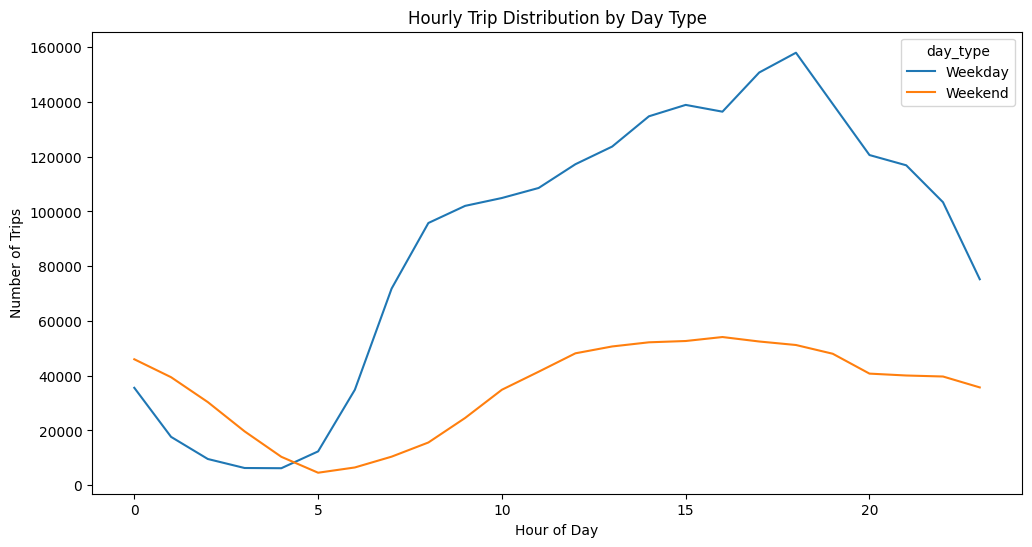

In [ ]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for weekday/weekend
df['day_type'] = df['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by pickup hour and day type, then calculate average trip counts
hourly_trips_by_day_type = df.groupby(['pickup_hour', 'day_type'])['tpep_pickup_datetime'].count().reset_index()

# Plotting the hourly trip distribution for weekdays and weekends
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='tpep_pickup_datetime', hue='day_type', data=hourly_trips_by_day_type)
plt.title('Hourly Trip Distribution by Day Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

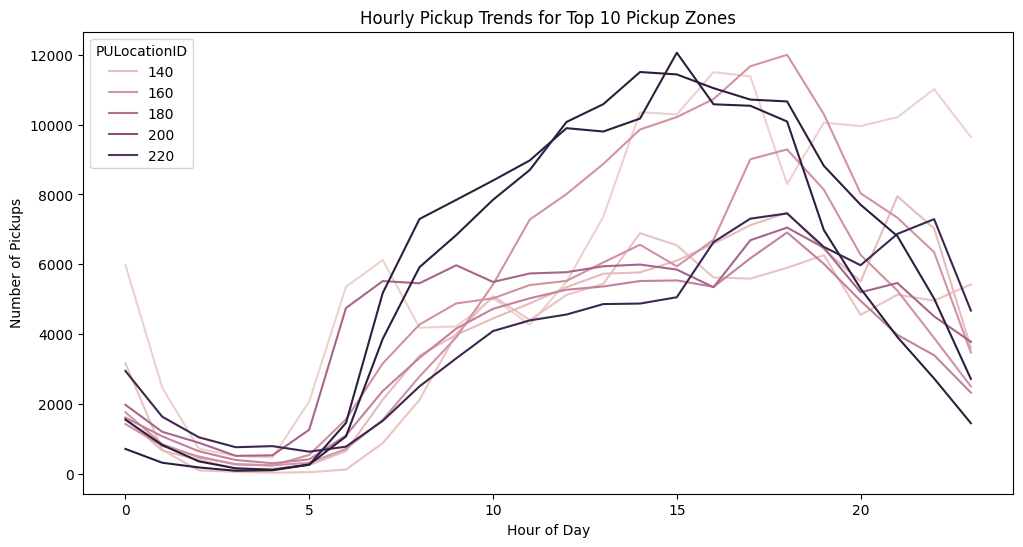

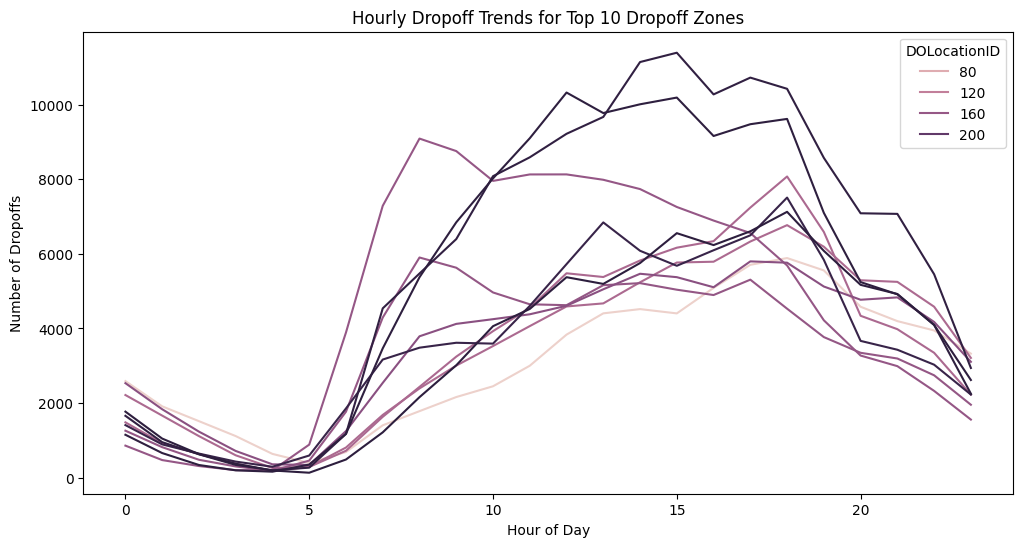

In [ ]:
# Find top 10 pickup and dropoff zones
top_10_pickup_zones = df.groupby('PULocationID')['tpep_pickup_datetime'].count().nlargest(10).index
top_10_dropoff_zones = df.groupby('DOLocationID')['tpep_dropoff_datetime'].count().nlargest(10).index

# Filter data for top pickup zones and group by hour
top_pickup_hourly_trends = df[df['PULocationID'].isin(top_10_pickup_zones)].groupby(['PULocationID', 'pickup_hour'])['tpep_pickup_datetime'].count().reset_index()

# Filter data for top dropoff zones and group by hour
top_dropoff_hourly_trends = df[df['DOLocationID'].isin(top_10_dropoff_zones)].groupby(['DOLocationID', 'pickup_hour'])['tpep_dropoff_datetime'].count().reset_index()

# Plotting pickup trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='tpep_pickup_datetime', hue='PULocationID', data=top_pickup_hourly_trends)
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

# Plotting dropoff trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='tpep_dropoff_datetime', hue='DOLocationID', data=top_dropoff_hourly_trends)
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df.groupby('PULocationID')['tpep_pickup_datetime'].count()
dropoff_counts = df.groupby('DOLocationID')['tpep_dropoff_datetime'].count()

# Calculate pickup/dropoff ratio for each zone
ratio_df = pd.DataFrame({'pickups': pickup_counts, 'dropoffs': dropoff_counts})
ratio_df['ratio'] = ratio_df['pickups'] / ratio_df['dropoffs']

# Fill NaN values with 0 (for zones with no dropoffs)
ratio_df['ratio'] = ratio_df['ratio'].fillna(0)

# Sort by ratio and get top and bottom 10
top_10_ratios = ratio_df.sort_values(by='ratio', ascending=False).head(10)
bottom_10_ratios = ratio_df.sort_values(by='ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)

Top 10 Pickup/Dropoff Ratios:
      pickups  dropoffs     ratio
70    12939.0    1495.0  8.654849
132  157034.0   30833.0  5.093050
138   88231.0   29839.0  2.956902
264   39150.0   21841.0  1.792500
186  107455.0   65561.0  1.639008
114   38318.0   27667.0  1.384971
43    48641.0   35910.0  1.354525
249   65421.0   48738.0  1.342300
162  103285.0   80474.0  1.283458
100   48088.0   39707.0  1.211071

Bottom 10 Pickup/Dropoff Ratios:
     pickups  dropoffs     ratio
27       NaN      27.0  0.000000
84       NaN      15.0  0.000000
58       NaN      74.0  0.000000
59       NaN      22.0  0.000000
176      NaN      24.0  0.000000
105      NaN       1.0  0.000000
199      2.0       NaN  0.000000
54      24.0     595.0  0.040336
252     22.0     534.0  0.041199
257     56.0    1216.0  0.046053


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (11 PM to 5 AM)
night_hours_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour <= 5)]

# Find top 10 pickup zones during night hours
top_10_night_pickup_zones = night_hours_df.groupby('PULocationID')['tpep_pickup_datetime'].count().nlargest(10).index

# Find top 10 dropoff zones during night hours
top_10_night_dropoff_zones = night_hours_df.groupby('DOLocationID')['tpep_dropoff_datetime'].count().nlargest(10).index

print("Top 10 Pickup Zones During Night Hours:")
print(top_10_night_pickup_zones)

print("\nTop 10 Dropoff Zones During Night Hours:")
print(top_10_night_dropoff_zones)

Top 10 Pickup Zones During Night Hours:
Index([79, 132, 249, 48, 148, 114, 230, 186, 107, 138], dtype='int64', name='PULocationID')

Top 10 Dropoff Zones During Night Hours:
Index([79, 48, 170, 141, 107, 68, 263, 249, 229, 236], dtype='int64', name='DOLocationID')


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Calculate revenue share for nighttime and daytime hours

# Define night hours (11 PM to 5 AM)
df['night_trip'] = ((df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour <= 5))

# Calculate total revenue for nighttime and daytime
nighttime_revenue = df[df['night_trip']]['total_amount'].sum()
daytime_revenue = df[~df['night_trip']]['total_amount'].sum()

# Calculate revenue share
total_revenue = nighttime_revenue + daytime_revenue
nighttime_share = (nighttime_revenue / total_revenue) * 100
daytime_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_share:.2f}%")

Nighttime Revenue Share: 12.35%
Daytime Revenue Share: 87.65%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
fare_per_mile_per_passenger = df.groupby('passenger_count').apply(
    lambda x: (x['fare_amount'].sum() / x['trip_distance'].sum()) / x['passenger_count'].mean()
).reset_index(name='fare_per_mile_per_passenger')

print(fare_per_mile_per_passenger)

   passenger_count  fare_per_mile_per_passenger
0              0.0                          inf
1              1.0                     5.562234
2              2.0                     2.657934
3              3.0                     1.820998
4              4.0                     1.402380
5              5.0                     1.091549
6              6.0                     0.924042


<ipython-input-71-b915eea54172>:3: RuntimeWarning: divide by zero encountered in scalar divide
  lambda x: (x['fare_amount'].sum() / x['trip_distance'].sum()) / x['passenger_count'].mean()
<ipython-input-71-b915eea54172>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fare_per_mile_per_passenger = df.groupby('passenger_count').apply(


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Analyze trip characteristics by RatecodeID
ratecode_analysis = df.groupby('RatecodeID').agg({
    'trip_distance': 'mean',
    'fare_amount': 'mean',
    'trip_duration': 'mean',
    'tip_amount': 'mean'
}).reset_index()

print(ratecode_analysis)

# You can further visualize this data using bar plots or other visualizations.

   RatecodeID  trip_distance  fare_amount  trip_duration  tip_amount
0         1.0       2.721911    15.891812      14.392684    3.035748
1         2.0      17.401945    69.893159      43.265376   10.926623
2         3.0      16.316411    84.326861      35.236995   12.343920
3         4.0      19.717561   104.909611      39.147545   10.752481
4         5.0       5.240916    71.111350      13.770973    8.514807
5         6.0       1.280000     6.020000       0.470000   16.330000
6        99.0       6.842372    34.018293      37.707492    0.001931


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Analyze trip patterns by borough

# Assuming you have merged the zones data with the trip data (df_merged)
borough_analysis = df_merged.groupby('borough').agg({
    'tpep_pickup_datetime': 'count',
    'trip_distance': 'mean',
    'fare_amount': 'mean',
    'trip_duration': 'mean'
}).reset_index()

print(borough_analysis)

# You can visualize this data using bar plots, box plots, or other visualizations to compare boroughs.

         borough  tpep_pickup_datetime  trip_distance  fare_amount  \
0          Bronx                  3861       5.247835    30.906812   
1       Brooklyn                 15269       4.512400    26.836030   
2            EWR                   398       1.638040    91.741960   
3      Manhattan               2628799       2.369557    14.868772   
4         Queens                280747      12.394852    51.362431   
5  Staten Island                   329      11.611429    51.499119   

   trip_duration  
0      29.059807  
1      23.746713  
2       2.240787  
3      13.827556  
4      32.030459  
5      39.652938  


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


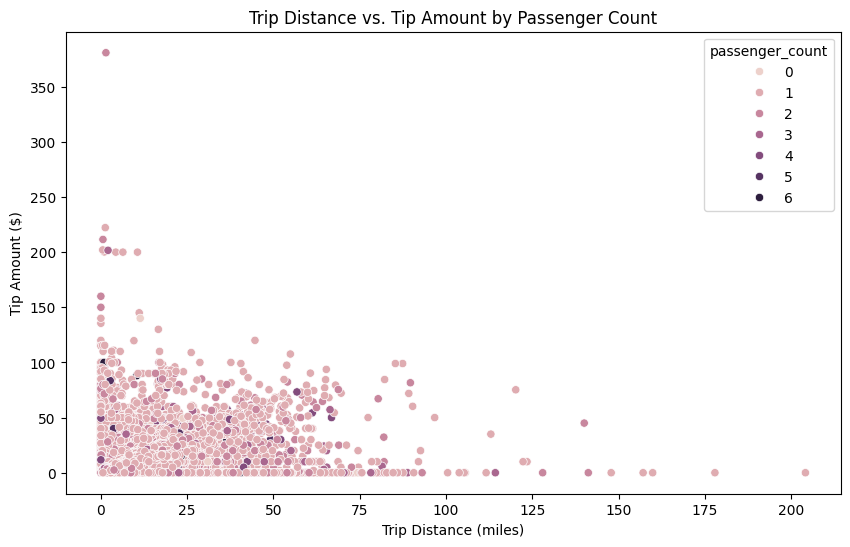

In [ ]:
# Analyze the relationship between trip distance and tip amount, considering passenger count

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', hue='passenger_count', data=df)
plt.title('Trip Distance vs. Tip Amount by Passenger Count')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

# You can also calculate correlation coefficients for different passenger count groups.

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

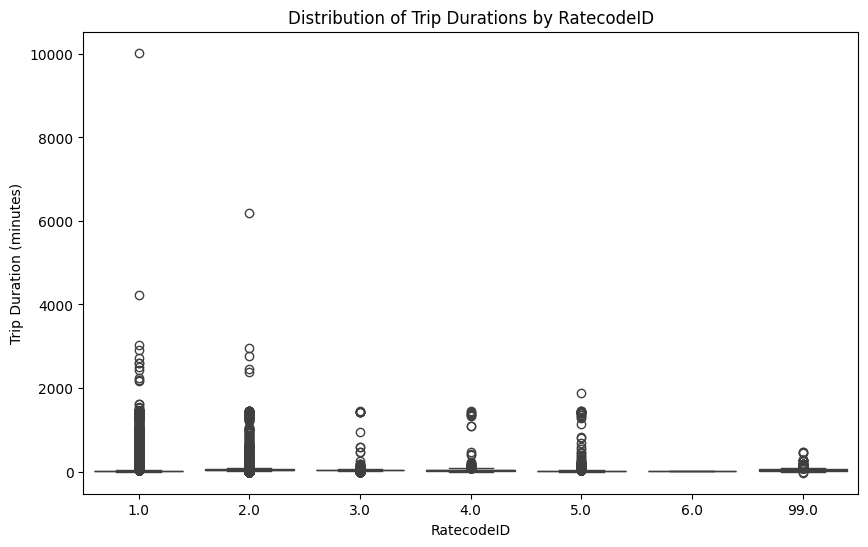

In [ ]:
# Analyze the distribution of trip durations for different RatecodeIDs

plt.figure(figsize=(10, 6))
sns.boxplot(x='RatecodeID', y='trip_duration', data=df)
plt.title('Distribution of Trip Durations by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Trip Duration (minutes)')
plt.show()

# You can also calculate descriptive statistics (mean, median, standard deviation) for trip durations within each RatecodeID group.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

# Filter trips with tip percentage < 10% and > 25%
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

# Compare trip characteristics
print("Low Tip Trips:")
print(low_tip_trips[['trip_distance', 'fare_amount', 'trip_duration', 'passenger_count']].describe())

print("\nHigh Tip Trips:")
print(high_tip_trips[['trip_distance', 'fare_amount', 'trip_duration', 'passenger_count']].describe())

# Further analysis and visualizations can be performed to explore the differences in more detail.

Low Tip Trips:
       trip_distance   fare_amount  trip_duration  passenger_count
count   1.009591e+06  1.009591e+06   1.009591e+06     1.009591e+06
mean    3.526984e+00  1.951496e+01   1.714879e+01     1.373261e+00
std     4.722557e+00  1.915501e+01   5.779677e+01     9.066214e-01
min     0.000000e+00  0.000000e+00  -2.920000e+01     0.000000e+00
25%     1.010000e+00  8.600000e+00   6.966667e+00     1.000000e+00
50%     1.800000e+00  1.350000e+01   1.171667e+01     1.000000e+00
75%     3.560000e+00  2.120000e+01   1.881667e+01     1.000000e+00
max     2.041000e+02  1.160100e+03   1.002918e+04     6.000000e+00

High Tip Trips:
       trip_distance   fare_amount  trip_duration  passenger_count
count   15299.000000  15299.000000   15299.000000     15299.000000
mean        2.277337     13.513368      12.220880         1.328257
std         3.575687     13.834617      50.415759         0.865119
min         0.000000      0.000000       0.016667         0.000000
25%         0.660000      6.50

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# Analyze the relationship between airport trips and trip characteristics

# Create a column indicating airport trips based on pickup or dropoff locations
# Assuming airport locations have specific PULocationID or DOLocationID values
airport_locations = [1, 132, 138]
df['airport_trip'] = df['PULocationID'].isin(airport_locations) | df['DOLocationID'].isin(airport_locations)

airport_trips = df[df['airport_trip'] == True]
non_airport_trips = df[df['airport_trip'] == False]

# Compare trip characteristics
print("Airport Trips:")
print(airport_trips[['trip_distance', 'fare_amount', 'trip_duration', 'tip_amount']].describe())

print("\nNon-Airport Trips:")
print(non_airport_trips[['trip_distance', 'fare_amount', 'trip_duration', 'tip_amount']].describe())

# Further analysis and visualizations can be performed to explore the differences in more detail.

Airport Trips:
       trip_distance    fare_amount  trip_duration     tip_amount
count  302143.000000  302143.000000  302143.000000  302143.000000
mean       13.347776      54.683469      33.912820       8.770224
std         6.100316      23.541217      44.113925       7.257094
min         0.000000       0.000000       0.000000       0.000000
25%         9.100000      38.700000      21.316667       0.000000
50%        12.450000      54.800000      30.850000      10.000000
75%        18.000000      70.000000      42.050000      14.800000
max       177.880000    1160.100000    2947.783333     200.000000

Non-Airport Trips:
       trip_distance   fare_amount  trip_duration    tip_amount
count   2.667671e+06  2.667671e+06   2.667671e+06  2.667671e+06
mean    2.243136e+00  1.453171e+01   1.361840e+01  2.776750e+00
std     2.221325e+00  1.046173e+01   4.259645e+01  2.599470e+00
min     0.000000e+00  0.000000e+00  -2.920000e+01  0.000000e+00
25%     1.000000e+00  8.600000e+00   6.750000e+00  

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

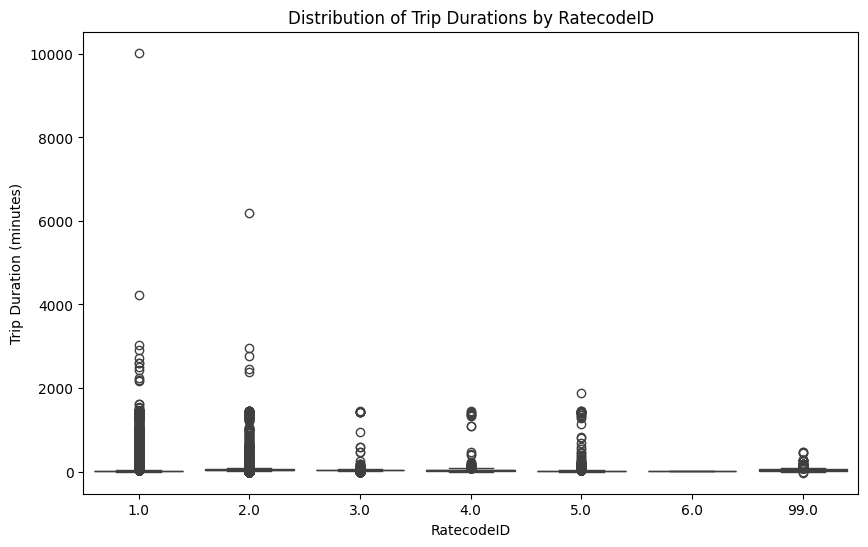

                count       mean        std        min        25%        50%  \
RatecodeID                                                                     
1.0         2816676.0  14.392684  42.513551   0.000000   6.983333  11.083333   
2.0          112537.0  43.265376  48.040476   0.000000  32.433333  41.333333   
3.0            8652.0  35.236995  45.578307   0.000000  26.500000  33.575000   
4.0            4297.0  39.147545  62.646049   0.000000  23.116667  33.000000   
5.0           14544.0  13.770973  56.013821   0.000000   0.116667   0.366667   
6.0               5.0   0.470000   0.413891   0.083333   0.100000   0.350000   
99.0          13103.0  37.707492  22.611859 -29.200000  22.083333  34.633333   

                  75%           max  
RatecodeID                           
1.0         17.066667  10029.183333  
2.0         51.566667   6179.400000  
3.0         42.366667   1439.800000  
4.0         45.250000   1439.300000  
5.0         16.333333   1881.516667  
6.0          

In [ ]:
# Calculate trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

# Analyze the distribution of trip durations for different RatecodeIDs
plt.figure(figsize=(10, 6))
sns.boxplot(x='RatecodeID', y='trip_duration', data=df)
plt.title('Distribution of Trip Durations by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Trip Duration (minutes)')
plt.show()

# You can also calculate descriptive statistics (mean, median, standard deviation) for trip durations within each RatecodeID group.
trip_duration_stats = df.groupby('RatecodeID')['trip_duration'].describe()
print(trip_duration_stats)

In [ ]:
# Calculate average passenger count per zone
avg_passenger_count = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passengers'}, inplace=True)

# Merge average passenger count into zones_with_trips GeoDataFrame
zones_with_trips = pd.merge(zones_with_trips, avg_passenger_count, on='PULocationID', how='left')

# Display the updated GeoDataFrame
print(zones_with_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  avg_passengers  
0       398.0        1.592965  
1         1.0        2.000000  
2       

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# Calculate tip percentage based on fare amount
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Filter trips with tip percentage < 10% and > 25%
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

# Compare trip characteristics
print("Low Tip Trips:")
print(low_tip_trips[['trip_distance', 'fare_amount', 'trip_duration', 'passenger_count']].describe())

print("\nHigh Tip Trips:")
print(high_tip_trips[['trip_distance', 'fare_amount', 'trip_duration', 'passenger_count']].describe())

# Further analysis and visualizations can be performed to explore the differences in more detail.

Low Tip Trips:
       trip_distance    fare_amount  trip_duration  passenger_count
count  786085.000000  786085.000000  786085.000000    786085.000000
mean        3.739116      20.550330      17.942832         1.385781
std         4.966019      20.246027      59.870639         0.915607
min         0.000000       0.010000     -29.200000         0.000000
25%         1.030000       9.300000       7.266667         1.000000
50%         1.860000      13.500000      12.100000         1.000000
75%         3.900000      23.300000      19.766667         1.000000
max       204.100000    1160.100000   10029.183333         6.000000

High Tip Trips:
       trip_distance   fare_amount  trip_duration  passenger_count
count   1.357658e+06  1.357658e+06   1.357658e+06     1.357658e+06
mean    2.218137e+00  1.358313e+01   1.164371e+01     1.350159e+00
std     2.723825e+00  1.068872e+01   2.902565e+01     8.886540e-01
min     0.000000e+00  0.000000e+00   0.000000e+00     0.000000e+00
25%     9.400000e-01 

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

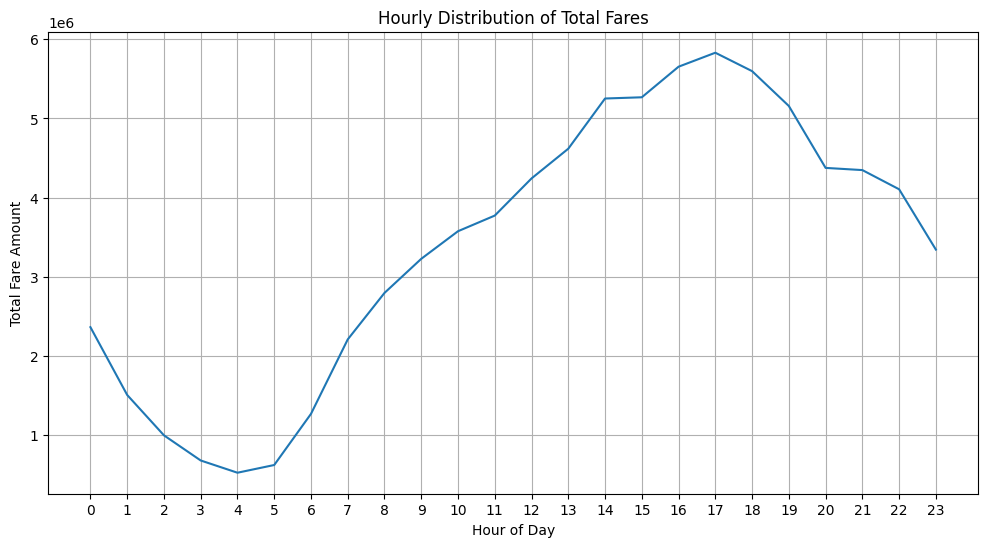

In [ ]:
hourly_fares = df.groupby('pickup_hour')['total_amount'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_fares.index, y=hourly_fares.values)
plt.title('Hourly Distribution of Total Fares')
plt.xlabel('Hour of Day')
plt.ylabel('Total Fare Amount')
plt.xticks(range(24))
plt.grid(True)
plt.show()

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

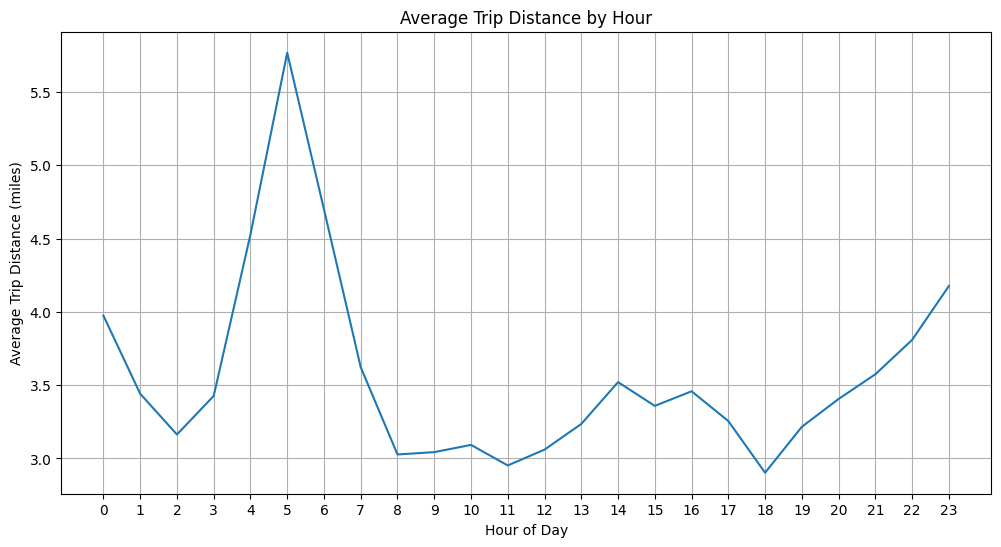

In [ ]:
hourly_distance = df.groupby('pickup_hour')['trip_distance'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_distance.index, y=hourly_distance.values)
plt.title('Average Trip Distance by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Consider applying surge pricing during peak hours: Index([0, 4, 5, 6, 14, 23], dtype='int32', name='pickup_hour')
Consider adjusting fares for high-demand zones: Index([  1,   5,   8,  10,  11,  14,  15,  16,  22,  23,  28,  29,  31,  38,
        39,  44,  55,  56,  64,  70,  86,  93,  98, 101, 108, 109, 111, 115,
       117, 118, 124, 130, 132, 134, 138, 139, 154, 155, 156, 157, 172, 180,
       187, 191, 194, 195, 196, 197, 200, 201, 203, 206, 210, 214, 215, 216,
       219, 221, 235, 240, 252, 253, 259, 265],
      dtype='int64', name='PULocationID')


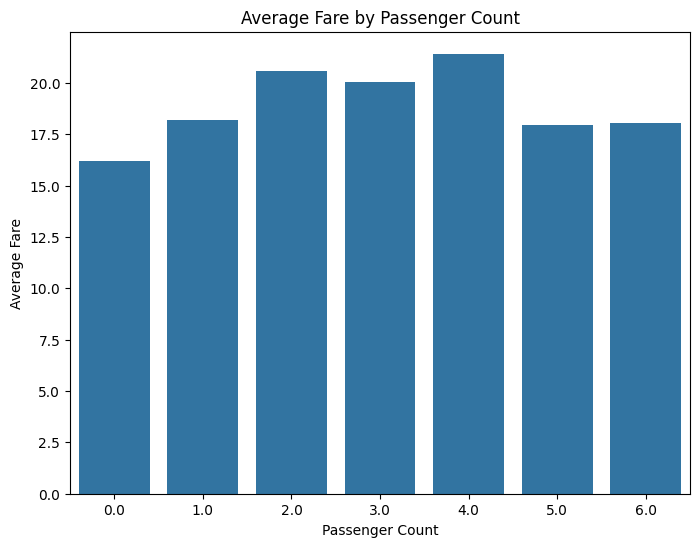

Analyze the fare trends for different passenger counts and propose adjustments accordingly.


In [ ]:
# Calculate average fare per hour
hourly_fares = df.groupby('pickup_hour')['fare_amount'].mean()

# Identify peak hours (e.g., hours with fares above a certain threshold)
peak_hours = hourly_fares[hourly_fares > hourly_fares.quantile(0.75)].index

# Propose surge pricing during peak hours
print(f"Consider applying surge pricing during peak hours: {peak_hours}")

# Calculate average fare per pickup zone
zone_fares = df.groupby('PULocationID')['fare_amount'].mean()

# Identify high-demand zones (e.g., zones with fares above a certain threshold)
high_demand_zones = zone_fares[zone_fares > zone_fares.quantile(0.75)].index

# Propose higher fares for high-demand zones
print(f"Consider adjusting fares for high-demand zones: {high_demand_zones}")

# Calculate average fare per passenger count
passenger_fares = df.groupby('passenger_count')['fare_amount'].mean()

# Identify trends in fares for different passenger counts
plt.figure(figsize=(8, 6))
sns.barplot(x=passenger_fares.index, y=passenger_fares.values)
plt.title('Average Fare by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare')
plt.show()

# Propose adjustments based on passenger count trends
print("Analyze the fare trends for different passenger counts and propose adjustments accordingly.")

